# Práctica 2: Procesamiento del Lenguaje Natural

__Fecha de entrega: 17 de abril de 2022__

El objetivo de esta práctica es aplicar los conceptos teóricos vistos en clase en el módulo de PLN. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [1]:
RANDOM_STATE = 42

# Apartado 2: Recuperación de información

__Número de grupo: 4__

__Nombres de los estudiantes: Fernando de la Gándara Fernández, Jaime Martínez Gamero, Laura Marta Marco Simal__

## 1) Carga del conjunto de datos

El fichero `BBC News.csv` contiene noticias clasificadas en 5 categorías diferentes. 

Carga los datos en un dataframe teniendo en cuenta que la columna `ArticleId` es un identificador de la noticia y por lo tanto no lo vamos a usar. 

Estudia el tamaño del conjunto de datos y la proporción de noticias que pertenecen a cada una de las categorías.

Crea una partición estratificada de los datos dejando el 80% para entrenamiento y el 20% restante para test usando la función `train_test_split` de sklearn. 

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
#from google.colab import files
#uploaded = files.upload()

#import io
#df_bbc = pd.read_csv(io.BytesIO(uploaded['BBC News.csv']))
# Dataset is now stored in a Pandas Dataframe

Saving BBC News.csv to BBC News.csv


In [4]:
df_bbc = pd.read_csv('BBC News.csv', index_col = 0)

In [5]:
df_bbc

,Text,Category
ArticleId,,
1833,worldcom ex-boss launches defence lawyers defe...,business
154,german business confidence slides german busin...,business
1101,bbc poll indicates economic gloom citizens in ...,business
1976,lifestyle governs mobile choice faster bett...,tech
917,enron bosses in $168m payout eighteen former e...,business
...,...,...
857,double eviction from big brother model caprice...,entertainment
325,dj double act revamp chart show dj duo jk and ...,entertainment
1590,weak dollar hits reuters revenues at media gro...,business


In [6]:
df_percentage = df_bbc['Category'].value_counts()/df_bbc.count()[0]
df_percentage


sport            0.232215
business         0.225503
politics         0.183893
entertainment    0.183221
tech             0.175168
Name: Category, dtype: float64

Podemos ver que es un dataset decentemente equilibrado, pues la diferencia de cantidad de elementos entre categorías es aceptable. Cabe destacar una mayor carga de textos "business" o categoría de empresa frente a una menor de tecnológicas.



Esta información deberemos de tenerla en cuenta a la hora de analizar los resultados ya que al haber un ligero desequilibrio entre algunas clases es probable que los modelos tiendan a inclinarse hacia las clases mayoritarias.

Veamos que esta proporción es aceptable de forma más gráfica usando un diagrama de tarta:

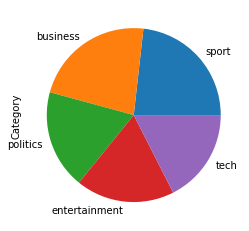

In [7]:
df_bbc['Category'].value_counts().plot.pie()

In [8]:
df_bbc['Text'][101]

'housewives lift channel 4 ratings the debut of us television hit desperate housewives has helped lift channel 4 s january audience share by 12% compared to last year.  other successes such as celebrity big brother and the simpsons have enabled the broadcaster to surpass bbc two for the first month since last july. bbc two s share of the audience fell from 11.2% to 9.6% last month in comparison with january 2004. celebrity big brother attracted fewer viewers than its 2002 series.  comedy drama desperate housewives managed to pull in five million viewers at one point during its run to date  attracting a quarter of the television audience. the two main television channels  bbc1 and itv1  have both seen their monthly audience share decline in a year on year comparison for january  while five s proportion remained the same at a slender 6.3%. digital multi-channel tv is continuing to be the strongest area of growth  with the bbc reporting freeview box ownership of five million  including on

In [9]:
np_bbc_target = df_bbc['Category'].to_numpy()
categories = set(np_bbc_target)
np_bbc_input = df_bbc['Text'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(np_bbc_input, np_bbc_target , 
                                                    test_size=0.20, stratify=np_bbc_target,
                                                    random_state= RANDOM_STATE)

## 2) Representación basada en bolsa de palabras y tf-idf

La primera vectorización que vamos a usar representará los mensajes usando el modelo de bolsa de palabras, monogramas y el valor tf-idf de cada palabra. Usa como _stop words_ las que vienen configuradas por defecto para el inglés.

Aplica la vectorización a los conjuntos de mensajes de entrenamiento y test. Muestra algún mensaje tanto en su formato de texto original como en la versión vectorizada. ¿Qué palabras se han eliminado y por qué?



### Vectorización de datos de entrenamiento

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', binary=False, ngram_range=(1,1))    

In [11]:
vectorizer.fit_transform(X_train)


#Extraemos las palabras de nuestro vector de palabras
feature_names = vectorizer.get_feature_names()
print(len(feature_names))

22260


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
print(feature_names[:30])
print(feature_names[6000:6030])
print(feature_names[-30:])

['00', '000', '0001', '000m', '000th', '001', '001and', '001st', '0051', '007', '01', '0100', '0130', '028', '03', '033', '04', '0400', '041', '04bn', '04secs', '05', '050', '050505', '0530gmt', '056', '05bn', '05m', '06', '060']
['delighted', 'delightful', 'delights', 'delirious', 'delist', 'delisted', 'delisting', 'deliver', 'deliverable', 'delivered', 'deliveries', 'delivering', 'delivery', 'dell', 'della', 'dellape', 'deloitte', 'delport', 'delta', 'delude', 'deluge', 'deluges', 'delusion', 'deluxe', 'dem', 'demand', 'demanded', 'demanding', 'demands', 'demean']
['zenden', 'zenith', 'zens', 'zeppelin', 'zero', 'zeta', 'zhang', 'zhaoxing', 'zidane', 'ziers', 'zimbabwe', 'zinc', 'zinedine', 'zip', 'ziyi', 'zodiac', 'zoe', 'zoellick', 'zombie', 'zombies', 'zone', 'zonealarm', 'zones', 'zoom', 'zooms', 'zooropa', 'zuluaga', 'zurich', 'zutons', 'zvonareva']


Eliminamos alfanuméricos raros

In [13]:
vectorizer = CountVectorizer(stop_words='english', binary=False, ngram_range=(1,1), token_pattern=r'(?u)\b[A-Za-z]+\b') 

train_vector_data=vectorizer.fit_transform(X_train)

feature_names = vectorizer.get_feature_names()
print(len(feature_names))


21166


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
print(feature_names[:30])
print(feature_names[6000:6030])
print(feature_names[-30:])

['aa', 'aaa', 'aaas', 'aac', 'aadc', 'aaliyah', 'aamir', 'aaron', 'abacus', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abating', 'abba', 'abbas', 'abbasi', 'abbott', 'abc', 'abd', 'abdellatif', 'abdication', 'abdomen', 'abdominal', 'abducted', 'abduction', 'abdullah', 'abdullatif', 'aberdeen', 'aberration']
['edits', 'edmondson', 'edu', 'eduardo', 'educate', 'educated', 'educates', 'educating', 'education', 'educational', 'educations', 'edward', 'edwards', 'eef', 'eeoc', 'eerdekens', 'eerie', 'eff', 'effect', 'effective', 'effectively', 'effectiveness', 'effects', 'efficacy', 'efficiencies', 'efficiency', 'efficient', 'efficiently', 'effort', 'effortlessly']
['zenden', 'zenith', 'zens', 'zeppelin', 'zero', 'zeta', 'zhang', 'zhaoxing', 'zidane', 'ziers', 'zimbabwe', 'zinc', 'zinedine', 'zip', 'ziyi', 'zodiac', 'zoe', 'zoellick', 'zombie', 'zombies', 'zone', 'zonealarm', 'zones', 'zoom', 'zooms', 'zooropa', 'zuluaga', 'zurich', 'zutons', 'zvonareva']


In [15]:
from sklearn.feature_extraction.text import TfidfTransformer 

tfidftrans = TfidfTransformer()
train_preprocessed = tfidftrans.fit_transform(train_vector_data)

###  Muestra de mensajes vectorizados

In [16]:
import numpy as np
import numpy.ma as ma

def write_terms (feature_names, data, vector_data, index):
    '''
    Escribe los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - data: lista de mensajes original (si data==None no se muestra el mensaje original)
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    # máscara para seleccionar sólo el mensaje en posición index
    mask=vector_data[index,:]>0
    
    # términos que aparecen en ese mensaje vectorizado
    terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))
    
    # mostrar mensaje original
    if data is not None:
        print('Mensaje', index, ':', data[index])
    
    # mostrar términos que aparecen en el mensaje vectorizado
    print('Mensaje', index, 'vectorizado:', terminos.compressed(),'\n')

In [17]:
write_terms(feature_names, X_train, train_preprocessed,100)


Mensaje 100 : blair says uk tsunami aid to soar tony blair has predicted the british government will eventually give  hundreds of millions  of pounds in aid to countries hit by the tsunami.  the prime minister was speaking publicly for the first time since returning from his holiday in egypt. mr blair insisted he had been  intimately involved  in  all decisions at all times  despite being abroad. he was speaking before the uk joins a three-minute silence at noon across the eu for the estimated 150 000 dead.  the foreign office says 41 britons are now confirmed to have died in the tsunami which struck south asia on boxing day  with 158 others missing. asked about criticism that he did not cut short his holiday  mr blair told bbc radio 4 s today programme:  i don t think this is a situation in which the british people need me to articulate what they feel.   i think they feel - as we all do - shock  horror  and absolute solidarity with those people who have lost their lives.  the importan

Se han eliminado términos poco relevantes como los sujetos o las preposiciones así como términos alfanuméricos que hemos quitado con las expresiones regulares.

La razón por la que han sido eliminadas es porque se tratan de términos que pueden producir ruido y que no aportan significado al texto ya que su única función es únicamente la de respetar las reglas de la gramática y ayudar a la comprensión lectora. En consecuencia a la hora de entrenar nuestro clasificador no tendrán utilidad en el aprendizaje.

### Vectorización del conjunto de test

In [18]:
# Tomamos los textos del conjunto de test y los transformamos en una matriz
# de palabras. Al usar "transform" toma como referencia únicamente las palabras
# encontradas en el conjunto de entrenamiento
test_vector_data = vectorizer.transform(X_test)

# Si sobre la consulta también realizamos la ponderación TF/IDF estamos amplificando
# el efecto de la misma a la hora de recuperar ejemplos relevantes
test_preprocessed = tfidftrans.transform(test_vector_data)

### Recuperación de ejemplos relevantes y cálculo de precisión a nivel X

Calcula la precisión@5 de cada una de las clases usando como consultas los documentos de la partición de test y la similitud del coseno. Vamos a considerar que un documento recuperado es relevante cuando pertenezca a la misma clase que la consulta.

Dibuja los resultados en un diagrama de barras y comenta las clases en las que se comporta mejor y peor. ¿Crees que los resultados son buenos?

Utilizamos las funciones del notebook de ejemplo para realizar los cálculos pertinentes.

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

def knn(query, X_train, k):
    '''Devuelve los índices de los k documentos de entrenamiento más similares a la consulta usando 
    la similitud del coseno.
    
    Parámetros:
    - query: documento consulta vectorizado
    - X_train: documentos de entrenamiento vectorizados
    - k: número de documentos a recuperar
    
    Devuelve:
    - índices de los k documentos más similares a la consulta.
    '''
    
    # Necesitamos un vector de dimensión (1, X). Si se pasa un vector de dimensión X, transformarlo
    if len(query.shape) == 1:
        query = query.reshape(1, -1)

    simil = cosine_similarity(query, X_train)
    simil_idx = np.argsort(simil.flatten())
    simil_idx = simil_idx[::-1]
    return simil_idx[:k]

In [20]:
def precision_at_k(y_selected, y_real, k):
    '''Devuelve la precisión @k de los documentos seleccionados.
    
    Parametros:
    - y_selected: etiquetas de los documentos seleccionados (se usan los k primeros)
    - y_real: etiqueta de la categoría correcta
    - k: número de documentos que se tienen en cuenta
    
    Devuelve:
    - Precisión@k
    '''
    
    return np.sum(y_selected[:k] == y_real) / k * 100

In [21]:
def mean_precisions_per_class(X_train, y_train, X_test, y_test, k):
    '''Devuelve las precision@k media para cada una de las classes.
    
    Parámetros:
    - X_train: documentos de entrenamiento vectorizados.
    - y_train: etiquetas de los documentos de entrenamiento.
    - X_test: documentos vectorizados que se usan como consultas
    - y_test: etiquetas de los documentos que se usan como consultas
    - k: número de documentos considerados a recuperar por la consulta
    
    Devuelve:
    - Diccionario clase -> precisión en tanto por ciento.
    '''
    
    # diccionario categoría -> lista de precisiones
    y_precisions = {y: [] for y in np.unique(y_test)}
    
    # Calcular precision@k para cada consulta
    for x_query, y_query in zip(X_test, y_test):
        idx = knn(x_query, X_train, k)
        y_selected = np.take(y_train, idx)
        precision = precision_at_k(y_selected, y_query, k)
        y_precisions[y_query].append(precision)
        
    # Calcular medias
    for y in y_precisions:
        y_precisions[y] = np.mean(y_precisions[y])
    
    return y_precisions

In [22]:
p5= mean_precisions_per_class(train_preprocessed, y_train, test_preprocessed[:], y_test[:], 5)
    
p5

{'business': 86.26865671641791,
 'entertainment': 86.54545454545455,
 'politics': 84.36363636363636,
 'sport': 98.26086956521739,
 'tech': 86.15384615384616}

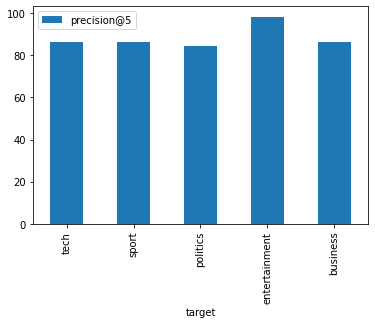

In [23]:
import pandas as pd

df_p5 = pd.DataFrame.from_dict(p5, orient='index', columns=['precision@5'])

df_p5["target"] =  list(set(y_train))
d = df_p5.set_index("target")

d.plot.bar()

De los valores de precición mostrados en la gráfica anterior para las distintas clases del conjunto de datos podemos extraer las siguientes conclusiones:

- Todos los valores de precisión se encuentran en un rango de valores muy similar a excepción de la categoría de noticias de política que destaca notablemente.

- Todas las clases tienen una precisión muy elevada y superior al 80%

- La clase para la que menor precisión se obtiene es la clase de las noticias de negocios. Pensamos que esto puede ser así ya que es un tema con términos y conceptos que pueden aparecer en otras noticias con bastante frecuencia. Por ejemplo en la parte anterior de la prática comentamos como sería probable que en el caso de una noticia de deportes se hablase sobre el fichaje de un nuevo jugador y su proceso de compra o por ejemplo en una noticia de politica un descubrimiento de un nuevo caso de corrupción  en el que esten implicados, por ejemplo, sociedades pantalla que son términos referentes a negocios. 

En consecuencia pensamos que los resultados son bastante satisfactorios.


## 3) Representación basada en word-embeddings y tf-idf

La segunda vectorización que vamos a usar representará los mensajes usando usando word-embeddings usando como pesos la frecuencia de aparición de cada palabra. Al igual que en el apartado anterior, usaremos monogramas y las _stop words_ que vienen configuradas por defecto para el inglés. Recuerda usar como vocabulario para vectorizar el vocabulario del fichero con las word-embeddings.

Aplica la vectorización a los conjuntos de mensajes de entrenamiento y test.

Calcula la precisión@5 de cada una de las clases usando como consultas los documentos de la partición de test y la similitud del coseno. Vamos a considerar que un documento recuperado es relevante cuando pertenezca a la misma clase que la consulta.

Dibuja los resultados en un diagrama de barras y compara los resultados con los del apartado anterior.

In [24]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

In [25]:
glove_file = 'glove.6B.50d.txt'
model = KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)

TypeError: ignored

In [26]:
we_vocabulary = list(model.key_to_index.keys())

print(we_vocabulary[0:10])

NameError: ignored

In [ ]:

# Ponemos nuestro corpus de palabras y lo vectorizamos, tanto la parte de entrenamiento como la de test.

vectorizer = CountVectorizer(vocabulary = we_vocabulary, binary = False)
X_train_preprocessed_embed = vectorizer.fit_transform(X_train)
X_test_preprocessed_embed = vectorizer.fit_transform(X_test)


In [ ]:
from scipy.sparse import find


def create_doc_embedding (doc_matrix_word_freq, keyedvectors):
    """
    create_doc_embedding creates a doc-embedding matrix where rows are the 
    documents and columns are the dimensions of the word-embedding. Each row r
    summarizes the vectors of the word-embeddings present in document r

    :param doc_matrix_word_freq: frequency matrix of the terms in each document
            It admits binary values, frequencies or weights.
            It admits the output of vectorizer.fit_transform
    :param keyedvectors: keyedvectors object from Gensim which has the 
            word-embedding information
    :return: returns the doc-embedding matrix that summarizes the 
             vector-embeddings of the words present in each document
    """ 

    
    num_docs, num_words= doc_matrix_word_freq.get_shape()

    # Creamos la matriz de documentos con tantas columnas como dimensiones tiene el we 
    doc_embed_matrix = np.zeros([num_docs,keyedvectors.vector_size])


    # Obtenemos los documentos
    docs, col, val = find(doc_matrix_word_freq)
    docs = np.unique(docs)

    # Para cada documento (esto se podrá hacer de forma más pythonica)
    for doc in docs:
      # Obtenemos las palabras presentes en el documento y su frecuencia
      row, words, frecs = find(doc_matrix_word_freq[doc,:])

      # Calculamos el vector medio para el documento
      # Para ello recuperamos los vectores del we presentes en el documento y 
      # los promediamos teniendo en cuenta su frecuencia
      count = 0
      for w,f in zip(words,frecs):
        doc_embed_matrix[doc,:] = doc_embed_matrix[doc,:] + (keyedvectors[w] * f)
        count = count +1
      doc_embed_matrix[doc,:] = doc_embed_matrix[doc,:]/count
    
      
    return doc_embed_matrix

In [ ]:
doc_train_matrix = create_doc_embedding(X_train_preprocessed_embed,model)
doc_test_matrix = create_doc_embedding(X_test_preprocessed_embed,model)

### Recuperación de ejemplos relevantes y cálculo de precisión a nivel 5


In [ ]:
p5= mean_precisions_per_class(doc_train_matrix, y_train, doc_test_matrix, y_test[:], 5)
    
p5

{'business': 88.65671641791045,
 'entertainment': 93.81818181818181,
 'politics': 88.36363636363636,
 'sport': 99.42028985507247,
 'tech': 92.6923076923077}

<AxesSubplot:xlabel='target'>

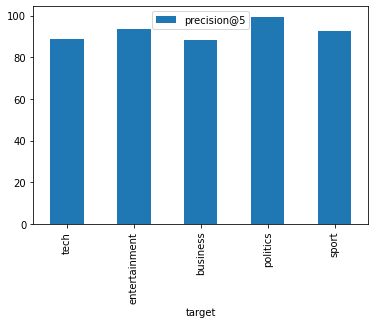

In [ ]:

df_p5 = pd.DataFrame.from_dict(p5, orient='index', columns=['precision@5'])

df_p5["target"] =  list(set(y_train))
d = df_p5.set_index("target")

d.plot.bar()

En comparación con los valores de precisión del apartado anterior podemos observar que los resultados han mejorado significativamente:

- Todos los valores de precisión siguen manteniéndose en un rango de valores muy similar y la categoría de noticias de política sigue destacando notablemente.

- Todas las clases continuan teniendo una precisión muy elevada, esta vez en torno al 90% frente al 80% obtenido anteriormente 

- La clase para la que menor precisión se obtiene continúa siendo la clase de las noticias de negocios

Puesto que los valores de precisión han mejorado de manera uniforme en todas las categoría podemos afirmar que los resultados han mejorado.


## 4) Análisis de errores

Vamos a investigar los resultados para entender mejor dónde están fallando los procesos de recuperación. Sigue los siguientes pasos.


1. Identifica la categoría de noticias donde la precisión media haya mejorado más al incorporar word-embeddings
2. Para dicha categoría, identifica la consulta donde la precisión haya mejorado más al usar word-embeddings
3. Muestra el texto original de la consulta y los términos que aparecen en las dos vectorizaciones tf-idf que usamos (recuerda que usamos diccionarios distintos para las vectorizaciones bolsa de palabras y word-embeddings).
4. Identifica las noticias recuperadas para dicha consulta para las dos aproximaciones y sus categorías (TF-IDF puro y con word-embeddings)
5. Muestra la intersección de términos entre la consulta y la primera noticia mal recuperada usando TF-IDF puro.
6. Muestra la intersección de términos entre la consulta y la última noticia bien recuperada usando word-embeddings.
7. A la luz de todo lo anterior, razona sobre por qué crees que el TF-IDF no fue capaz de clasificar bien la noticia y el word-embedding sí.


Puedes usar el código que calcula la intersección de términos que ponemos a continuación

In [ ]:
def terms_in_message(feature_names,vector_data,index):
    '''
    Devuelve un conjunto los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    mensaje=vector_data[index,:]>0
    terminos_presentes = ma.array(feature_names, mask = ~(mensaje[0].toarray()))

    return set(terminos_presentes.compressed())

In [ ]:
terms_in_message(feature_names,train_preprocessed,0)

{'added',
 'adding',
 'agree',
 'america',
 'analyst',
 'asia',
 'asian',
 'atlantic',
 'average',
 'barrel',
 'based',
 'bin',
 'borne',
 'brent',
 'carried',
 'cartel',
 'citing',
 'close',
 'closed',
 'cold',
 'contributed',
 'crude',
 'cut',
 'days',
 'decline',
 'declines',
 'demand',
 'dollar',
 'east',
 'electronic',
 'euro',
 'europe',
 'expectations',
 'factor',
 'falling',
 'fathi',
 'freeze',
 'freezing',
 'gertz',
 'given',
 'gmt',
 'halt',
 'heavy',
 'high',
 'highs',
 'immediately',
 'inflate',
 'keeps',
 'libya',
 'london',
 'low',
 'members',
 'minister',
 'month',
 'morning',
 'need',
 'new',
 'north',
 'november',
 'october',
 'oil',
 'opec',
 'output',
 'past',
 'peak',
 'pound',
 'price',
 'prices',
 'primary',
 'production',
 'purvin',
 'pushed',
 'reached',
 'reason',
 'rebound',
 'recent',
 'reuters',
 'rise',
 'rising',
 'rose',
 's',
 'said',
 'saw',
 'served',
 'shatwan',
 'shivering',
 'shum',
 'sides',
 'singapore',
 'snowfalls',
 'strengthened',
 'strong',
